# Classification on Stock Market data set

In [115]:
import numpy as np
import pandas as pd

In [116]:
data = pd.read_csv('stock_data.csv', usecols=range(1,10), index_col=0, parse_dates=True)
data.head()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
Year,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [117]:
#here we are changing the direction values of up and down to 0 and 1 
data['direction2']=data['Direction'].factorize()[0]
data.head(10)

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,direction2
Year,,,,,,,,,
2001-01-01,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,0
2001-01-01,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,0
2001-01-01,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,1
2001-01-01,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,0
2001-01-01,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,0
2001-01-01,0.213,0.614,-0.623,1.032,0.959,1.3491,1.392,Up,0
2001-01-01,1.392,0.213,0.614,-0.623,1.032,1.4450,-0.403,Down,1
2001-01-01,-0.403,1.392,0.213,0.614,-0.623,1.4078,0.027,Up,0
2001-01-01,0.027,-0.403,1.392,0.213,0.614,1.1640,1.303,Up,0


In [118]:
X_lag1 = data['Lag1'].values.reshape(-1,1)
X_lag2 = data['Lag2'].values.reshape(-1,1)

In [119]:
y_direction = data['direction2'].values.reshape(-1,1)

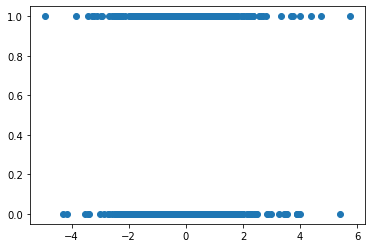

In [120]:
import matplotlib.pyplot as plt

plt.scatter(X_lag1,y_direction)

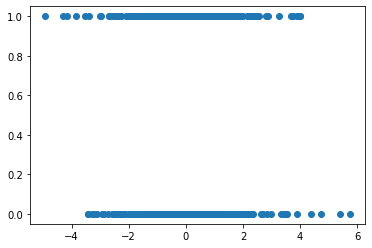

In [121]:
plt.scatter(X_lag2,y_direction)

## Now we split the data into training and test data according to time. Data before 2004 as training, data after 2004 as test.

In [122]:
X_train = data[:'2004'][['Lag1','Lag2']]
y_train = data[:'2004']['direction2']

X_test = data['2005':][['Lag1','Lag2']]
y_test = data['2005':]['direction2']

## Use the following methods (i) logistic regression (ii) LDA (iii) QDA (p.149 in textbook) and (iv) k-nearest neighbor and do (a) fit the model using training data (b) make prediction for the test data and (c) compare the truth and prediction in test data

### Logistic regression

In [123]:
import sklearn.linear_model as skl_lm

In [124]:
clf = skl_lm.LogisticRegression(solver='newton-cg')
pred_lg = clf.fit(X_train,y_train).predict(X_train)
(-1.)*clf.intercept_/clf.coef_

array([[0.58079799, 0.72617964]])

In [125]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score

print(classification_report(y_train, pred_lg, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.52      0.68      0.59       507
         Yes       0.51      0.34      0.41       491

    accuracy                           0.52       998
   macro avg       0.52      0.51      0.50       998
weighted avg       0.52      0.52      0.50       998



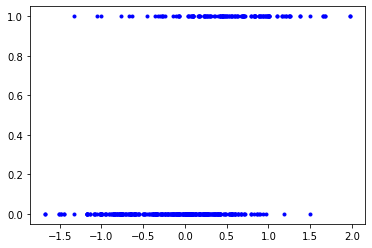

In [126]:
#here we display our predicted values for after 2004 
y_log = clf.predict(X_test)
plt.plot(X_test, y_log, 'b.')

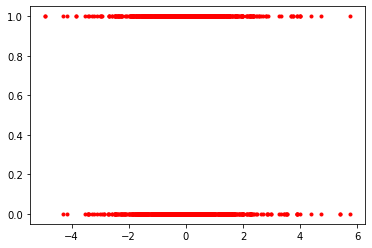

In [127]:
#just for comparison here is the distribution of before 2004
plt.plot(X_train, y_train, 'r.')

### LDA

In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [129]:
lda = LinearDiscriminantAnalysis(solver='svd')
pred_lda = lda.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, pred_lda, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.58      0.75      0.66       141
         Yes       0.50      0.32      0.39       111

    accuracy                           0.56       252
   macro avg       0.54      0.53      0.52       252
weighted avg       0.55      0.56      0.54       252



In [130]:
print(lda.means_)

[[-0.03954635 -0.03132544]
 [ 0.04279022  0.03389409]]


In [131]:
print(lda.priors_)

[0.50801603 0.49198397]


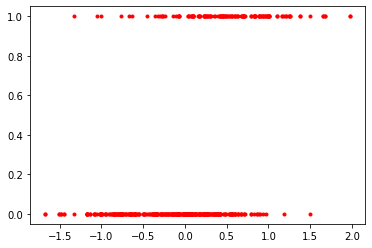

In [132]:
y_lda = lda.predict(X_test)
plt.plot(X_test, y_lda, 'r.')

### QDA

In [133]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

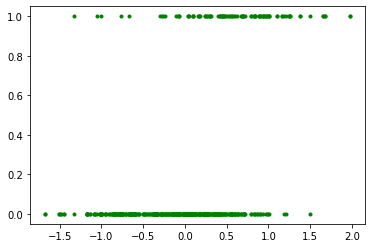

In [134]:
qda = QuadraticDiscriminantAnalysis()
y_qda = qda.fit(X_train, y_train).predict(X_test)
plt.plot(X_test, y_qda, 'g.')

### k-nearest neighbor (you may try 2 different k values to see which one performs better)

In [135]:
from sklearn import neighbors

In [136]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2)
y_knn1 = knn.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_knn1, digits=3))

              precision    recall  f1-score   support

           0      0.578     0.837     0.684       141
           1      0.521     0.225     0.314       111

    accuracy                          0.567       252
   macro avg      0.550     0.531     0.499       252
weighted avg      0.553     0.567     0.521       252



In [137]:
knn3 = neighbors.KNeighborsClassifier(n_neighbors=3)
y_knn3 = knn3.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_knn3, digits=3))

              precision    recall  f1-score   support

           0      0.577     0.610     0.593       141
           1      0.466     0.432     0.449       111

    accuracy                          0.532       252
   macro avg      0.522     0.521     0.521       252
weighted avg      0.528     0.532     0.529       252



For the n_neighbors I found that n=2 had the highest precision, recall, and f-score

### After comparing all different models and parameters, which method gives the best prediction power for the stock market data set?

Out of the models that we have done through this notebook the k-nearest neighbor performs the best over linear regression, LDA, and QDA. Overall, for the parameter of n_neighbors=2 was the best performing.